# Prediction Financial indicators

In [1]:
import numpy as np 
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize 
from nltk.stem import PorterStemmer
import spacy
nltk.download('punkt')
nltk.download('stopwords')
# module to split data into training / test
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gyx18\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gyx18\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## I. Data collecting

In [2]:
# read data
df = pd.read_csv('data/all-data.csv', delimiter=',', encoding='latin-1', header=None).fillna('')
df = df.rename(columns=lambda x: ['sentiment', 'text'][x])
print(df.shape)
df.head()

(4846, 2)


sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

In [3]:
df

sentiment                                               text
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]

## II. Text Preprocessing

In [4]:
df2=df.copy()
for i,line in enumerate(df2["text"]):
    cutwords1 = word_tokenize(line)
    print('\n【Results after NLTK word segmentation：】')
    print(cutwords1)
    
    interpunctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']   #liste punctuation marks
    cutwords2 = [word.lower() for word in cutwords1 if word not in interpunctuations]   #remove punctuation
    print('\n【Remove symbol results after NLTK word segmentation：】')
    print(cutwords2)
    
    stops = set(stopwords.words("english")) #stop words
    cutwords3 = [word for word in cutwords2 if word not in stops]
    print('\n【Remove stop word results after NLTK word segmentation：】')
    print(cutwords3)

    df2.loc[i,"text"]=cutwords3


【Results after NLTK word segmentation：】
['According', 'to', 'Gran', ',', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'Russia', ',', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing', '.']

【Remove symbol results after NLTK word segmentation：】
['according', 'to', 'gran', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'russia', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing']

【Remove stop word results after NLTK word segmentation：】
['according', 'gran', 'company', 'plans', 'move', 'production', 'russia', 'although', 'company', 'growing']

【Results after NLTK word segmentation：】
['Technopolis', 'plans', 'to', 'develop', 'in', 'stages', 'an', 'area', 'of', 'no', 'less', 'than', '100,000', 'square', 'meters', 'in', 'order', 'to', 'host', 'companies', 'working', 'in', 'computer', 'technologies', 'and', 'telecommunications', ',', 'the', 'statement', 'said', '.']

【Remove symbol res


【Remove stop word results after NLTK word segmentation：】
['satama', "'s", 'net', 'profit', 'third', 'quarter', '2007', 'rose', '275,000', 'euro', '395,000', '270,000', 'euro', '388,000', 'period', '2006']

【Results after NLTK word segmentation：】
['Section', ':', 'Regional', 'News', '-', 'The', 'demand', 'in', 'Finnair', "'s", 'Asian', 'traffic', ',', 'measured', 'in', 'passenger', 'kilometers', ',', 'was', 'up', '34.9', '%', 'in', 'August', 'compare', 'to', 'last', 'year', '.']

【Remove symbol results after NLTK word segmentation：】
['section', 'regional', 'news', '-', 'the', 'demand', 'in', 'finnair', "'s", 'asian', 'traffic', 'measured', 'in', 'passenger', 'kilometers', 'was', 'up', '34.9', 'in', 'august', 'compare', 'to', 'last', 'year']

【Remove stop word results after NLTK word segmentation：】
['section', 'regional', 'news', '-', 'demand', 'finnair', "'s", 'asian', 'traffic', 'measured', 'passenger', 'kilometers', '34.9', 'august', 'compare', 'last', 'year']

【Results after NLTK wo


【Remove stop word results after NLTK word segmentation：】
['revenue', 'grew', '1', 'percent', 'euro742', '.2', 'million', 'us', '964', 'million', 'euro735', 'million']

【Results after NLTK word segmentation：】
['Ruukki', "'s", 'order', 'book', 'at', 'the', 'end', 'of', '2010', 'was', '30', '%', 'up', 'year-on-year', 'and', '10', '%', 'up', 'quarter-on-quarter', '.']

【Remove symbol results after NLTK word segmentation：】
['ruukki', "'s", 'order', 'book', 'at', 'the', 'end', 'of', '2010', 'was', '30', 'up', 'year-on-year', 'and', '10', 'up', 'quarter-on-quarter']

【Remove stop word results after NLTK word segmentation：】
['ruukki', "'s", 'order', 'book', 'end', '2010', '30', 'year-on-year', '10', 'quarter-on-quarter']

【Results after NLTK word segmentation：】
['Ruukki', 'signed', 'the', 'contract', 'with', 'Norwegian', 'company', 'Veidekke', 'Entreprenor', 'AS', '.']

【Remove symbol results after NLTK word segmentation：】
['ruukki', 'signed', 'the', 'contract', 'with', 'norwegian', 'company'


【Remove stop word results after NLTK word segmentation：】
['marimekko', 'today', '20', 'november', 'signed', 'license', 'agreement', 'swedish', 'chain', 'whereby', 'marimekko', 'license', 'popular', 'patterns', '1950s', '1960s', '1970s', 'h']

【Results after NLTK word segmentation：】
['More', 'staff', 'has', 'been', 'recruited', 'in', 'Japan', 'to', 'further', 'complement', 'its', 'network', 'of', 'close', 'to', '50', 'service', 'locations', 'in', 'more', 'than', '20', 'countries', 'worldwide', '.']

【Remove symbol results after NLTK word segmentation：】
['more', 'staff', 'has', 'been', 'recruited', 'in', 'japan', 'to', 'further', 'complement', 'its', 'network', 'of', 'close', 'to', '50', 'service', 'locations', 'in', 'more', 'than', '20', 'countries', 'worldwide']

【Remove stop word results after NLTK word segmentation：】
['staff', 'recruited', 'japan', 'complement', 'network', 'close', '50', 'service', 'locations', '20', 'countries', 'worldwide']

【Results after NLTK word segmentation：】


【Remove stop word results after NLTK word segmentation：】
['first', 'nine', 'months', '2010', 'company', "'s", 'net', 'loss', 'narrowed', 'eur', '415,000', 'eur', '7.4', 'million', 'corresponding', 'period', '2009']

【Results after NLTK word segmentation：】
['In', 'the', 'first', 'nine', 'months', 'of', '2010', ',', 'the', 'company', "'s", 'net', 'loss', 'narrowed', 'to', 'EUR415', ',000', 'from', 'EUR7', '.4', 'm', 'for', 'the', 'corresponding', 'period', 'of', '2009', '.']

【Remove symbol results after NLTK word segmentation：】
['in', 'the', 'first', 'nine', 'months', 'of', '2010', 'the', 'company', "'s", 'net', 'loss', 'narrowed', 'to', 'eur415', ',000', 'from', 'eur7', '.4', 'm', 'for', 'the', 'corresponding', 'period', 'of', '2009']

【Remove stop word results after NLTK word segmentation：】
['first', 'nine', 'months', '2010', 'company', "'s", 'net', 'loss', 'narrowed', 'eur415', ',000', 'eur7', '.4', 'corresponding', 'period', '2009']

【Results after NLTK word segmentation：】
['(', 'A


【Remove stop word results after NLTK word segmentation：】
['net', 'sales', '2007', 'totalled', 'eur', '329', 'million', 'operating', 'margin', '19']

【Results after NLTK word segmentation：】
['Nevertheless', ',', 'Fitch', 'notes', 'that', 'the', 'business', 'fundamentals', 'of', 'the', 'three', 'banks', 'currently', 'remain', 'sound', '.']

【Remove symbol results after NLTK word segmentation：】
['nevertheless', 'fitch', 'notes', 'that', 'the', 'business', 'fundamentals', 'of', 'the', 'three', 'banks', 'currently', 'remain', 'sound']

【Remove stop word results after NLTK word segmentation：】
['nevertheless', 'fitch', 'notes', 'business', 'fundamentals', 'three', 'banks', 'currently', 'remain', 'sound']

【Results after NLTK word segmentation：】
['Nokia', 'controls', 'more', 'than', '50', 'percent', 'of', 'phone', 'sales', 'in', 'India', 'and', 'Africa', ',', 'and', 'has', 'a', 'strong', 'prosition', 'on', 'most', 'other', 'emerging', 'markets', '.']

【Remove symbol results after NLTK word se


【Remove stop word results after NLTK word segmentation：】
['finnish', 'cargotec', 'awarded', 'significant', 'order', 'total', '292', 'hiab', 'loader', 'cranes', 'bae', 'systems', 'us']

【Results after NLTK word segmentation：】
['Finnish', 'Cargotec', "'s", 'Kalmar', 'has', 'received', 'a', 'significant', 'order', 'from', 'the', 'US', 'Department', 'of', 'Defense', '.']

【Remove symbol results after NLTK word segmentation：】
['finnish', 'cargotec', "'s", 'kalmar', 'has', 'received', 'a', 'significant', 'order', 'from', 'the', 'us', 'department', 'of', 'defense']

【Remove stop word results after NLTK word segmentation：】
['finnish', 'cargotec', "'s", 'kalmar', 'received', 'significant', 'order', 'us', 'department', 'defense']

【Results after NLTK word segmentation：】
['Finnish', 'Outotec', 'has', 'been', 'awarded', 'a', 'contract', 'to', 'supply', 'a', 'new', 'zinc', 'roaster', 'with', 'gas', 'cleaning', 'and', 'sulphuric', 'acid', 'plant', 'for', 'the', 'OZK', 'Kardzhali', 'zinc', 'smelter'


【Remove stop word results after NLTK word segmentation：】
['finnish', 'suominen', 'corporation', 'makes', 'wet', 'wipes', 'nonwovens', 'flexible', 'packaging', 'starting', 'employer-employee', 'negotiations', 'tampere', 'plant', 'finland', 'lay', '25', 'employees']

【Results after NLTK word segmentation：】
['Swedish', 'Wallenberg', 'family', 'controlled', 'Investor', 'has', 'bought', 'a', 'large', 'stake', 'of', 'C', 'shares', 'in', 'Swedish', 'retail', 'bank', 'SEB', '.']

【Remove symbol results after NLTK word segmentation：】
['swedish', 'wallenberg', 'family', 'controlled', 'investor', 'has', 'bought', 'a', 'large', 'stake', 'of', 'c', 'shares', 'in', 'swedish', 'retail', 'bank', 'seb']

【Remove stop word results after NLTK word segmentation：】
['swedish', 'wallenberg', 'family', 'controlled', 'investor', 'bought', 'large', 'stake', 'c', 'shares', 'swedish', 'retail', 'bank', 'seb']

【Results after NLTK word segmentation：】
['According', 'to', 'Arokarhu', ',', 'some', 'of', 'the', 'purc


【Remove stop word results after NLTK word segmentation：】
['however', 'short-term', 'rentals', 'becoming', 'popular']

【Results after NLTK word segmentation：】
['HUHTAMAKI', 'OYJ', 'STOCK', 'EXCHANGE', 'RELEASE', '16.12.2008', 'AT', '09:30', 'Huhtamaki', 'Oyj', 'has', 'resolved', 'to', 'clarify', 'the', 'Group', 'structure', 'by', 'separating', 'the', 'Foodservice', 'and', 'Consumer', 'Goods', 'businesses', 'in', 'its', 'production', 'unit', 'in', 'Hameenlinna', ',', 'Finland', 'by', 'transferring', 'the', 'businesses', 'into', 'its', 'wholly', 'owned', 'subsidiaries', '.']

【Remove symbol results after NLTK word segmentation：】
['huhtamaki', 'oyj', 'stock', 'exchange', 'release', '16.12.2008', 'at', '09:30', 'huhtamaki', 'oyj', 'has', 'resolved', 'to', 'clarify', 'the', 'group', 'structure', 'by', 'separating', 'the', 'foodservice', 'and', 'consumer', 'goods', 'businesses', 'in', 'its', 'production', 'unit', 'in', 'hameenlinna', 'finland', 'by', 'transferring', 'the', 'businesses', 'int


【Remove stop word results after NLTK word segmentation：】
['``', 'approach', 'much', 'use', 'raw', 'materials', 'produced', 'line', 'principles', 'sustainable', 'development']

【Results after NLTK word segmentation：】
['``', 'Our', 'Vaalipalvelu-service', 'was', 'especially', 'developed', 'for', 'use', 'by', 'communities', 'and', 'organizations', '.']

【Remove symbol results after NLTK word segmentation：】
['``', 'our', 'vaalipalvelu-service', 'was', 'especially', 'developed', 'for', 'use', 'by', 'communities', 'and', 'organizations']

【Remove stop word results after NLTK word segmentation：】
['``', 'vaalipalvelu-service', 'especially', 'developed', 'use', 'communities', 'organizations']

【Results after NLTK word segmentation：】
['``', 'Rapala', 'is', 'excited', 'to', 'be', 'partnering', 'with', 'RBFF', 'and', 'other', 'industry', 'leaders', 'on', 'this', 'holiday', 'promotion', '.', '``']

【Remove symbol results after NLTK word segmentation：】
['``', 'rapala', 'is', 'excited', 'to', 'be', 


【Remove stop word results after NLTK word segmentation：】
['nokian', 'tyres', "'", 'tyres', 'considered', 'genuine', 'winter', 'tyres', 'russia']

【Results after NLTK word segmentation：】
['Of', 'these', 'shares', '29,659,239', 'are', 'held', 'by', 'the', 'Company', 'or', 'its', 'group', 'companies', 'and', 'the', 'number', 'of', 'outstanding', 'shares', 'and', 'voting', 'rights', 'attached', 'to', 'the', 'shares', 'thus', 'amounts', 'to', '322,705,218', '.']

【Remove symbol results after NLTK word segmentation：】
['of', 'these', 'shares', '29,659,239', 'are', 'held', 'by', 'the', 'company', 'or', 'its', 'group', 'companies', 'and', 'the', 'number', 'of', 'outstanding', 'shares', 'and', 'voting', 'rights', 'attached', 'to', 'the', 'shares', 'thus', 'amounts', 'to', '322,705,218']

【Remove stop word results after NLTK word segmentation：】
['shares', '29,659,239', 'held', 'company', 'group', 'companies', 'number', 'outstanding', 'shares', 'voting', 'rights', 'attached', 'shares', 'thus', 'a


【Remove stop word results after NLTK word segmentation：】
['helsinki', 'afx', '-', 'outokumpu', 'said', 'technology', 'unit', '28', 'mln', 'eur', 'contract', 'bosnia-herzegovina', "'s", 'aluminij', 'dd', 'mostar', 'upgrade', 'anode', 'plant']

【Results after NLTK word segmentation：】
['HK', 'Ruokatalo', 'now', 'accounts', 'for', 'about', '50', '%', 'of', 'poultry', 'sales', 'in', 'Finland', ',', 'and', 'profitability', 'is', 'at', 'a', 'good', 'level', '.']

【Remove symbol results after NLTK word segmentation：】
['hk', 'ruokatalo', 'now', 'accounts', 'for', 'about', '50', 'of', 'poultry', 'sales', 'in', 'finland', 'and', 'profitability', 'is', 'at', 'a', 'good', 'level']

【Remove stop word results after NLTK word segmentation：】
['hk', 'ruokatalo', 'accounts', '50', 'poultry', 'sales', 'finland', 'profitability', 'good', 'level']

【Results after NLTK word segmentation：】
['However', ',', 'the', 'bottom-line', 'result', 'improved', 'thanks', 'to', 'positive', 'financial', 'items', '.']

【Re


【Remove stop word results after NLTK word segmentation：】
['companies', '20,000', 'sq', 'm.', 'office', 'commercial', 'building', 'substantial', 'amount', 'building', 'right', 'new', 'shopping', 'center', 'liljeholmen', 'stockholm']

【Results after NLTK word segmentation：】
['This', 'bold', 'spinning', '360', 'red', 'fabric', 'design', 'is', 'set', 'beautifully', 'on', 'Ercols', 'Napoli', 'sofa', '.']

【Remove symbol results after NLTK word segmentation：】
['this', 'bold', 'spinning', '360', 'red', 'fabric', 'design', 'is', 'set', 'beautifully', 'on', 'ercols', 'napoli', 'sofa']

【Remove stop word results after NLTK word segmentation：】
['bold', 'spinning', '360', 'red', 'fabric', 'design', 'set', 'beautifully', 'ercols', 'napoli', 'sofa']

【Results after NLTK word segmentation：】
['TomTom', 'has', 'given', 'assurances', 'that', 'it', 'will', 'continue', 'to', 'sell', 'maps', 'to', 'competitors', 'if', 'it', 'wins', 'EU', 'approval', '.']

【Remove symbol results after NLTK word segmentatio


【Remove stop word results after NLTK word segmentation：】
['2007', 'alma', 'media', "'s", 'operating', 'profit', 'eur', '53mn']

【Results after NLTK word segmentation：】
['In', '2007', ',', 'almost', 'two', 'thirds', 'of', 'Orion', "'s", 'net', 'sales', 'came', 'from', 'these', 'drugs', '.']

【Remove symbol results after NLTK word segmentation：】
['in', '2007', 'almost', 'two', 'thirds', 'of', 'orion', "'s", 'net', 'sales', 'came', 'from', 'these', 'drugs']

【Remove stop word results after NLTK word segmentation：】
['2007', 'almost', 'two', 'thirds', 'orion', "'s", 'net', 'sales', 'came', 'drugs']

【Results after NLTK word segmentation：】
['In', '2007', ',', 'Huhtamaki', 'will', 'continue', 'to', 'invest', 'in', 'organic', 'growth', '.']

【Remove symbol results after NLTK word segmentation：】
['in', '2007', 'huhtamaki', 'will', 'continue', 'to', 'invest', 'in', 'organic', 'growth']

【Remove stop word results after NLTK word segmentation：】
['2007', 'huhtamaki', 'continue', 'invest', 'organic


【Remove stop word results after NLTK word segmentation：】
['group', 'expand', 'chain', 'include', '45', 'stores']

【Results after NLTK word segmentation：】
['The', 'insurance', 'division', 'turned', 'a', 'EUR120m', 'profit', '.']

【Remove symbol results after NLTK word segmentation：】
['the', 'insurance', 'division', 'turned', 'a', 'eur120m', 'profit']

【Remove stop word results after NLTK word segmentation：】
['insurance', 'division', 'turned', 'eur120m', 'profit']

【Results after NLTK word segmentation：】
['The', 'ISO', 'certification', 'demonstrates', 'that', 'we', 'are', 'moving', 'forward', 'in', 'our', 'quality', 'commitments', 'to', 'our', 'customers', '.', "'"]

【Remove symbol results after NLTK word segmentation：】
['the', 'iso', 'certification', 'demonstrates', 'that', 'we', 'are', 'moving', 'forward', 'in', 'our', 'quality', 'commitments', 'to', 'our', 'customers', "'"]

【Remove stop word results after NLTK word segmentation：】
['iso', 'certification', 'demonstrates', 'moving', 'f


【Remove stop word results after NLTK word segmentation：】
['addition', 'existing', 'service', 'counter', 'area', 'reception', 'hall', 'rebuilt', 'access', 'provided', 'local', 'rail', 'connections']

【Results after NLTK word segmentation：】
['In', 'addition', 'a', 'reduction', 'of', 'nine', 'persons', 'will', 'be', 'made', 'through', 'pension', 'or', 'other', 'arrangements', ',', 'the', 'company', 'added', '.']

【Remove symbol results after NLTK word segmentation：】
['in', 'addition', 'a', 'reduction', 'of', 'nine', 'persons', 'will', 'be', 'made', 'through', 'pension', 'or', 'other', 'arrangements', 'the', 'company', 'added']

【Remove stop word results after NLTK word segmentation：】
['addition', 'reduction', 'nine', 'persons', 'made', 'pension', 'arrangements', 'company', 'added']

【Results after NLTK word segmentation：】
['In', 'addition', 'to', 'the', 'Tulikivi', 'Corporation', ',', 'he', 'is', 'also', 'currently', 'a', 'member', 'of', 'the', 'Board', 'of', 'the', 'following', 'compani


【Remove stop word results after NLTK word segmentation：】
['sponda', 'plc', "'s", 'annual', 'general', 'meeting', 'decided', '23', 'march', '2005', 'establish', 'shareholders', "'", 'nomination', 'committee', 'prepare', 'proposals', 'annual', 'general', 'meeting', '2006', 'composition', 'board', 'directors', 'remuneration']

【Results after NLTK word segmentation：】
['SRV', 'will', 'also', 'build', 'an', 'aqua', 'park', 'with', 'wellness', 'area', ',', 'a', 'restaurant', 'and', 'a', 'multifunctional', 'ice', 'arena', '.']

【Remove symbol results after NLTK word segmentation：】
['srv', 'will', 'also', 'build', 'an', 'aqua', 'park', 'with', 'wellness', 'area', 'a', 'restaurant', 'and', 'a', 'multifunctional', 'ice', 'arena']

【Remove stop word results after NLTK word segmentation：】
['srv', 'also', 'build', 'aqua', 'park', 'wellness', 'area', 'restaurant', 'multifunctional', 'ice', 'arena']

【Results after NLTK word segmentation：】
['SSH', 'Communications', 'Security', 'Corporation', 'is', 'h


【Remove stop word results after NLTK word segmentation：】
['aspo', "'s", 'group', 'structure', 'business', 'operations', 'continually', 'developed', 'without', 'predefined', 'schedules']

【Results after NLTK word segmentation：】
['Aspo', 'serves', 'demanding', 'business-to-business', 'customers', '.']

【Remove symbol results after NLTK word segmentation：】
['aspo', 'serves', 'demanding', 'business-to-business', 'customers']

【Remove stop word results after NLTK word segmentation：】
['aspo', 'serves', 'demanding', 'business-to-business', 'customers']

【Results after NLTK word segmentation：】
['Aspocomp', 'said', 'it', 'will', 'spin', 'off', 'its', 'Chinese', 'and', 'Indian', 'units', ',', 'and', 'some', 'equipment', 'from', 'its', 'Salo', 'plant', 'in', 'Finland', ',', 'into', 'a', 'newly-formed', 'unit', ',', 'most', 'of', 'which', 'it', 'will', 'then', 'sell', 'on', 'to', 'Hong', 'Kong-listed', 'Meadville', '.']

【Remove symbol results after NLTK word segmentation：】
['aspocomp', 'said', '


【Remove stop word results after NLTK word segmentation：】
['finnish', 'investment', 'group', 'neomarkka', 'oyj', 'hel', 'nembv', 'said', 'today', 'buy', 'former', 'production', 'facilities', 'kuitu', 'finland', 'ltd', 'part', 'negotiations', 'option', 'invest', 'specialty', 'cellulose', 'fiber', 'business']

【Results after NLTK word segmentation：】
['Finnish', 'investor', 'Scanfil', 'Oyj', '(', 'HEL', ':', 'SCF1V', ')', 'said', 'last', 'Friday', 'it', 'has', 'bought', '57', 'million', 'shares', ',', 'or', '32.96', '%', ',', 'in', 'Norwegian', 'contract', 'electronics', 'manufacturer', 'Kitron', 'ASA', '(', 'OSL', ':', 'KIT', ')', 'for', 'NOK', '143.9', 'million', '(', 'USD', '24.4', 'm-EUR', '18.1', 'm', ')', '.']

【Remove symbol results after NLTK word segmentation：】
['finnish', 'investor', 'scanfil', 'oyj', 'hel', 'scf1v', 'said', 'last', 'friday', 'it', 'has', 'bought', '57', 'million', 'shares', 'or', '32.96', 'in', 'norwegian', 'contract', 'electronics', 'manufacturer', 'kitron', '


【Remove stop word results after NLTK word segmentation：】
['approximately', '20,000', 'dwt', 'vessel', 'ordered', 'india']

【Results after NLTK word segmentation：】
['The', 'arrangements', 'do', 'not', 'apply', 'to', 'the', 'group', "'s", 'units', 'outside', 'Finland', '.']

【Remove symbol results after NLTK word segmentation：】
['the', 'arrangements', 'do', 'not', 'apply', 'to', 'the', 'group', "'s", 'units', 'outside', 'finland']

【Remove stop word results after NLTK word segmentation：】
['arrangements', 'apply', 'group', "'s", 'units', 'outside', 'finland']

【Results after NLTK word segmentation：】
['The', 'Bank', 'of', '+_land', 'acquired', 'the', 'private', 'banking', 'business', ',', 'asset', 'management', ',', 'and', 'share', 'brokerage', 'business', 'of', 'Kaupthing', 'Sweden', 'in', 'early', '2009', '.']

【Remove symbol results after NLTK word segmentation：】
['the', 'bank', 'of', '+_land', 'acquired', 'the', 'private', 'banking', 'business', 'asset', 'management', 'and', 'share', 


【Remove stop word results after NLTK word segmentation：】
['ecb', 'mainly', 'target', 'inflation']

【Results after NLTK word segmentation：】
['The', 'Efore', 'plant', 'at', 'Saarijarvi', 'in', 'central', 'Finland', 'is', 'one', 'of', 'the', 'largest', 'employers', 'in', 'the', 'region', '.']

【Remove symbol results after NLTK word segmentation：】
['the', 'efore', 'plant', 'at', 'saarijarvi', 'in', 'central', 'finland', 'is', 'one', 'of', 'the', 'largest', 'employers', 'in', 'the', 'region']

【Remove stop word results after NLTK word segmentation：】
['efore', 'plant', 'saarijarvi', 'central', 'finland', 'one', 'largest', 'employers', 'region']

【Results after NLTK word segmentation：】
['The', 'employee', 'negotiations', 'are', 'to', 'address', 'measures', 'needed', 'to', 'adjust', 'the', 'operations', 'to', 'the', 'present', 'production', 'situation', '.']

【Remove symbol results after NLTK word segmentation：】
['the', 'employee', 'negotiations', 'are', 'to', 'address', 'measures', 'needed',


【Remove stop word results after NLTK word segmentation：】
['give', 'bedroom', 'cool', 'makeover', 'summer']

【Results after NLTK word segmentation：】
['Virala', 'Oy', 'Ab', 'was', 'allocated', 'by', 'the', 'Board', 'of', 'Directors', 'an', 'amount', 'of', 'EUR', '1,9', 'million', 'which', 'is', 'EUR', '0,25', 'million', 'lower', 'than', 'maximum', 'announced', 'on', '12/30/2010', '.']

【Remove symbol results after NLTK word segmentation：】
['virala', 'oy', 'ab', 'was', 'allocated', 'by', 'the', 'board', 'of', 'directors', 'an', 'amount', 'of', 'eur', '1,9', 'million', 'which', 'is', 'eur', '0,25', 'million', 'lower', 'than', 'maximum', 'announced', 'on', '12/30/2010']

【Remove stop word results after NLTK word segmentation：】
['virala', 'oy', 'ab', 'allocated', 'board', 'directors', 'amount', 'eur', '1,9', 'million', 'eur', '0,25', 'million', 'lower', 'maximum', 'announced', '12/30/2010']

【Results after NLTK word segmentation：】
['With', 'five', 'different', 'game', 'modes', ',', 'co-op',


【Remove stop word results after NLTK word segmentation：】
['aspocomp', 'group', 'headquartered', 'helsinki', 'finland', 'develops', 'interconnection', 'solutions', 'electronics', 'industry']

【Results after NLTK word segmentation：】
['Based', 'in', 'Helsinki', ',', 'Finland', ',', 'Ramirent', 'has', 'branches', 'in', '13', 'Nordic', ',', 'central', 'and', 'Eastern', 'European', 'countries', '.']

【Remove symbol results after NLTK word segmentation：】
['based', 'in', 'helsinki', 'finland', 'ramirent', 'has', 'branches', 'in', '13', 'nordic', 'central', 'and', 'eastern', 'european', 'countries']

【Remove stop word results after NLTK word segmentation：】
['based', 'helsinki', 'finland', 'ramirent', 'branches', '13', 'nordic', 'central', 'eastern', 'european', 'countries']

【Results after NLTK word segmentation：】
['Based', 'on', 'the', '2005', 'calendar', 'year', 'the', 'combined', 'company', 'had', 'EUR15', '.8', 'bn', 'in', 'pro', 'forma', 'annual', 'revenues', 'and', 'is', 'expected', 'to'


【Remove stop word results after NLTK word segmentation：】
["'s", 'outokumpu', 'technology', 'business', 'begin', 'trading', 'nordic', 'exchange', 'helsinki', 'starting', 'oct.', '10', 'becoming', 'sixth', 'company', 'list', 'exchange', 'year', 'company', 'said', 'friday']

【Results after NLTK word segmentation：】
['Salo', ',', 'Finland', ',', '29', 'August', '2006', '-', 'Benefon', 'has', 'today', 'announced', 'its', 'plans', 'to', 'further', 'strengthen', 'its', 'in-house', 'technology', 'platform', ',', 'by', 'licensing', 'the', 'complete', 'mobile', 'software', 'platform', ',', 'Opna', ',', 'from', 'its', 'long-standing', 'technology', 'partner', ',', 'Pollex', '.']

【Remove symbol results after NLTK word segmentation：】
['salo', 'finland', '29', 'august', '2006', '-', 'benefon', 'has', 'today', 'announced', 'its', 'plans', 'to', 'further', 'strengthen', 'its', 'in-house', 'technology', 'platform', 'by', 'licensing', 'the', 'complete', 'mobile', 'software', 'platform', 'opna', 'from',


【Remove stop word results after NLTK word segmentation：】
['manufacture', 'cpps', 'undertaken', 'existing', 'export', 'oriented', 'unit', 'eou', 'wartsila', "'s", 'factory', 'khopoli', 'near', 'mumbai']

【Results after NLTK word segmentation：】
['The', 'manufacturing', 'will', 'begin', 'in', 'Pietarsaari', 'in', 'the', 'beginning', 'of', 'the', 'year', '2009', 'and', 'the', 'delivery', 'will', 'take', 'place', 'in', 'October', '2009', '.']

【Remove symbol results after NLTK word segmentation：】
['the', 'manufacturing', 'will', 'begin', 'in', 'pietarsaari', 'in', 'the', 'beginning', 'of', 'the', 'year', '2009', 'and', 'the', 'delivery', 'will', 'take', 'place', 'in', 'october', '2009']

【Remove stop word results after NLTK word segmentation：】
['manufacturing', 'begin', 'pietarsaari', 'beginning', 'year', '2009', 'delivery', 'take', 'place', 'october', '2009']

【Results after NLTK word segmentation：】
['The', 'markets', 'expect', 'Heineken', 'to', 'sell', 'Hartwall', 'as', 'a', 'whole', 'or


【Remove stop word results after NLTK word segmentation：】
['rivals', 'say', 'qualcomm', 'fewer', 'patents', '3g', 'phones', 'earlier', 'versions', 'lower', 'rates']

【Results after NLTK word segmentation：】
['The', 'company', 'reported', 'today', 'an', 'operating', 'loss', 'of', 'EUR0', '.1', 'm', 'on', 'net', 'sales', 'of', 'EUR4', '.5', 'm', 'for', 'the', 'first', 'quarter', '2008', '.']

【Remove symbol results after NLTK word segmentation：】
['the', 'company', 'reported', 'today', 'an', 'operating', 'loss', 'of', 'eur0', '.1', 'm', 'on', 'net', 'sales', 'of', 'eur4', '.5', 'm', 'for', 'the', 'first', 'quarter', '2008']

【Remove stop word results after NLTK word segmentation：】
['company', 'reported', 'today', 'operating', 'loss', 'eur0', '.1', 'net', 'sales', 'eur4', '.5', 'first', 'quarter', '2008']

【Results after NLTK word segmentation：】
['The', 'company', "'s", 'annual', 'loss', 'amounted', 'to', 'EEK', '18mn', ',', 'compared', 'to', 'a', 'profit', 'of', 'EEK', '7.3', 'mn', 'in', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
df2

sentiment                                               text
0      neutral  [according, gran, company, plans, move, produc...
1      neutral  [technopolis, plans, develop, stages, area, le...
2     negative  [international, electronic, industry, company,...
3     positive  [new, production, plant, company, would, incre...
4     positive  [according, company, 's, updated, strategy, ye...
...        ...                                                ...
4841  negative  [london, marketwatch, --, share, prices, ended...
4842   neutral  [rinkuskiai, 's, beer, sales, fell, 6.5, per, ...
4843  negative  [operating, profit, fell, eur, 35.4, mn, eur, ...
4844  negative  [net, sales, paper, segment, decreased, eur, 2...
4845  negative  [sales, finland, decreased, 10.5, january, sal...

[4846 rows x 2 columns]

In [6]:
df3=df2.copy()
for i,t in enumerate(df3["text"]):
    df3.loc[i,"text"]=" ".join(t)
df3

sentiment                                               text
0      neutral  according gran company plans move production r...
1      neutral  technopolis plans develop stages area less 100...
2     negative  international electronic industry company elco...
3     positive  new production plant company would increase ca...
4     positive  according company 's updated strategy years 20...
...        ...                                                ...
4841  negative  london marketwatch -- share prices ended lower...
4842   neutral  rinkuskiai 's beer sales fell 6.5 per cent 4.1...
4843  negative  operating profit fell eur 35.4 mn eur 68.8 mn ...
4844  negative  net sales paper segment decreased eur 221.6 mn...
4845  negative  sales finland decreased 10.5 january sales out...

[4846 rows x 2 columns]

## III. statistics

### III.1. Statistical Sentiment Value Ratio

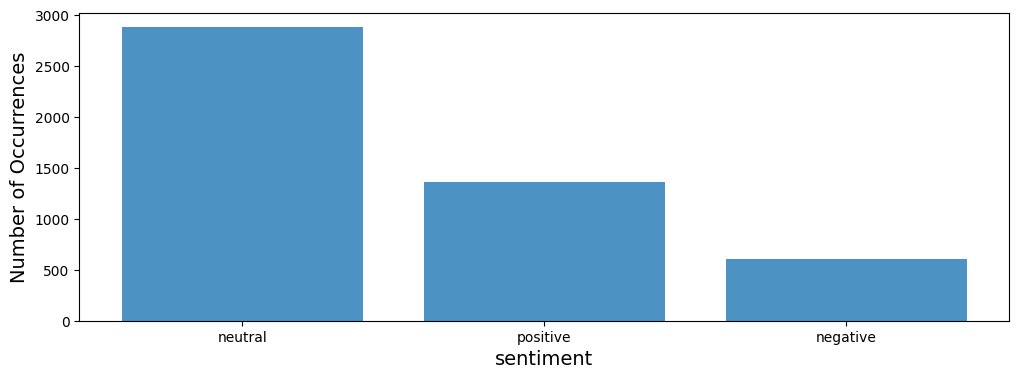

In [7]:
cnt_pro = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
plt.bar(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('sentiment', fontsize=14)
plt.show();

### III.2. Draw word cloud

In [8]:
words_neu=[]
words_pos=[]
words_neg=[]
for i,sen in enumerate (df2["sentiment"]):
    if sen == "neutral" :
        line = df2.loc[i,"text"]
        words_neu.extend(line)
    if sen == "positive" :
        line = df2.loc[i,"text"]
        words_pos.extend(line)
    if sen == "negative" :
        line = df2.loc[i,"text"]
        words_neg.extend(line)
                


Generate a word cloud based on word frequency and delete high-frequency words (high-frequency words in different emotional reports have a high degree of repetition)

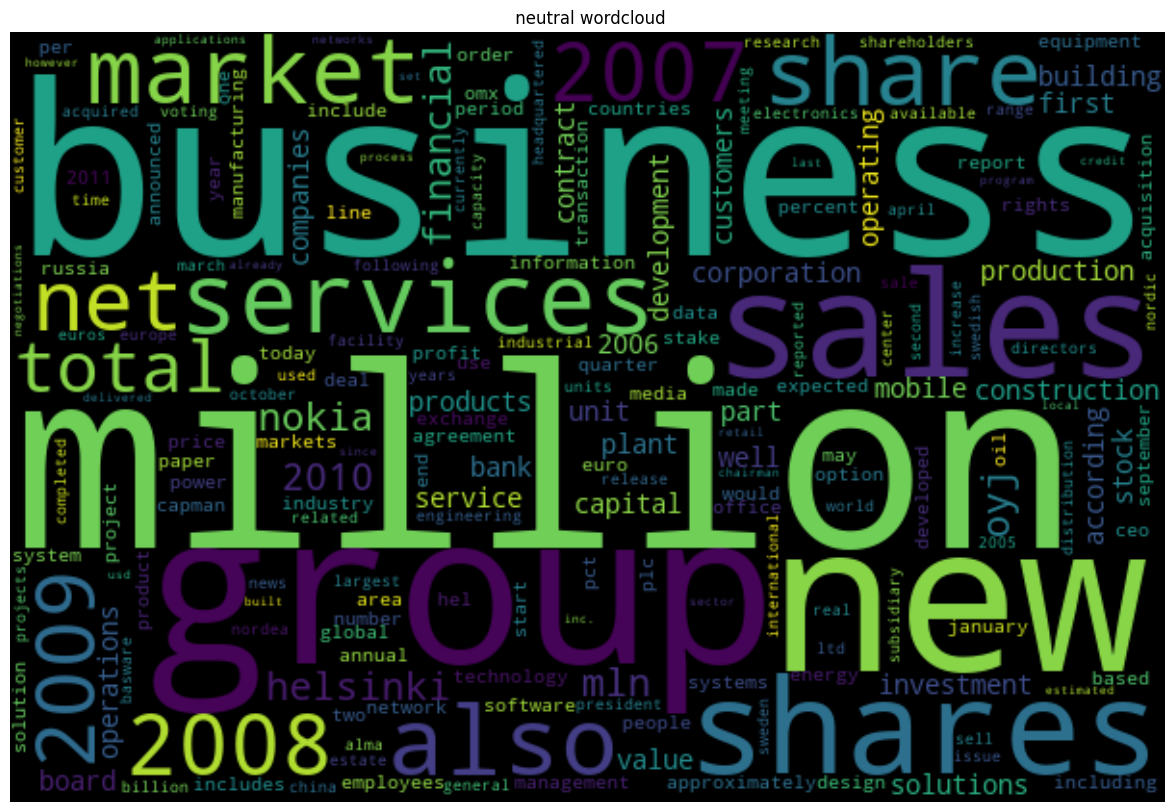

In [9]:
stop_words = set(stopwords.words('english'))
words_neu_dict={}
words_pos_dict={}
words_neg_dict={}
for w in words_neu:
    if w not in stop_words and len(w)>2 and w not in words_neu_dict:
        words_neu_dict[w]=words_neu.count(w)
for w in words_pos:
    if w not in stop_words and len(w)>2 and w not in words_pos_dict:
        words_pos_dict[w]=words_pos.count(w)
for w in words_neg:
    if w not in stop_words and len(w)>2 and w not in words_neg_dict:
        words_neg_dict[w]=words_neg.count(w)
        
        
words_neu_dict =sorted(words_neu_dict.items(), key=lambda x: x[1], reverse=True)
for i in range(5):
    del words_neu_dict[0]
words_neu_dict=dict(words_neu_dict)


words_neg_dict = sorted(words_neg_dict.items(), key=lambda x: x[1], reverse=True)
for i in range(5):
    del words_neg_dict[0]
words_neg_dict=dict(words_neg_dict)
    

words_pos_dict = sorted(words_pos_dict.items(), key=lambda x: x[1], reverse=True)
for i in range(5):
    del words_pos_dict[0]
words_pos_dict=dict(words_pos_dict)
    

# objet WordCloud
wordcloud = WordCloud(width=600, height=400).generate_from_frequencies(words_neu_dict)

# draw
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(" neutral wordcloud")
plt.axis("off")
plt.show()



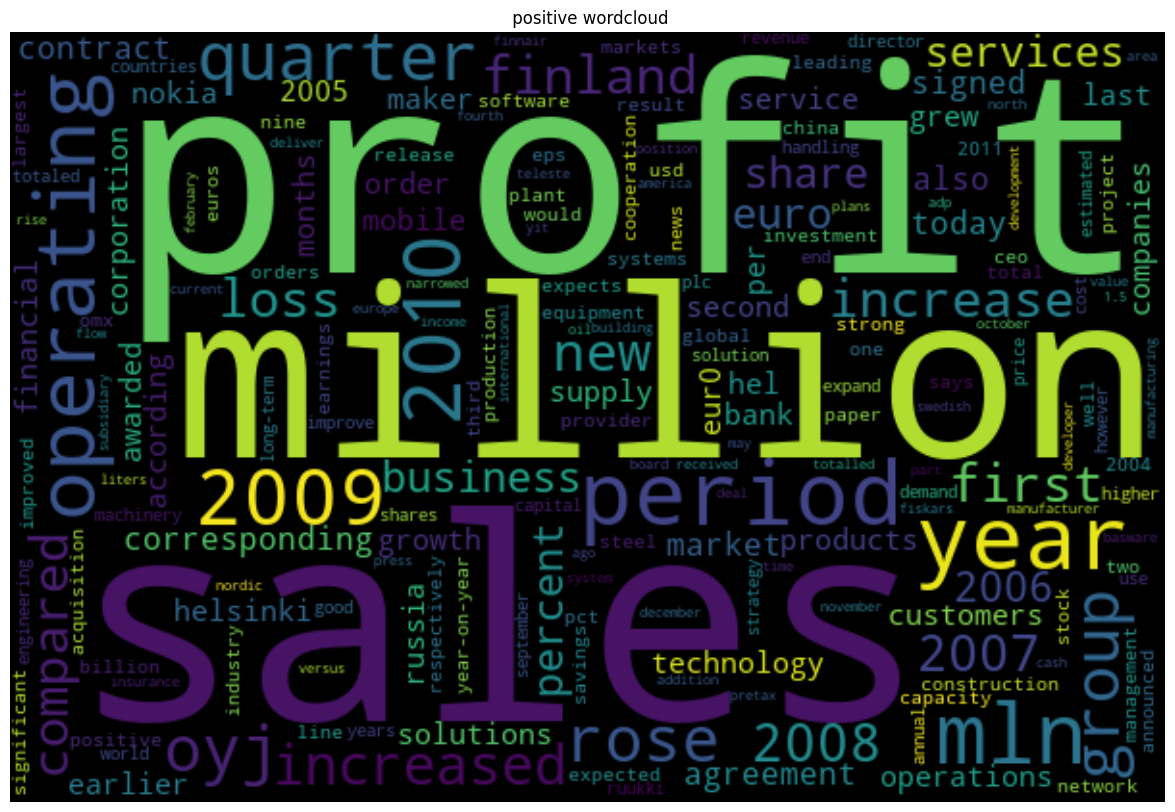

In [10]:
wordcloud2 = WordCloud(width=600, height=400).generate_from_frequencies(words_pos_dict)

# draw
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title(" positive wordcloud")
plt.show()


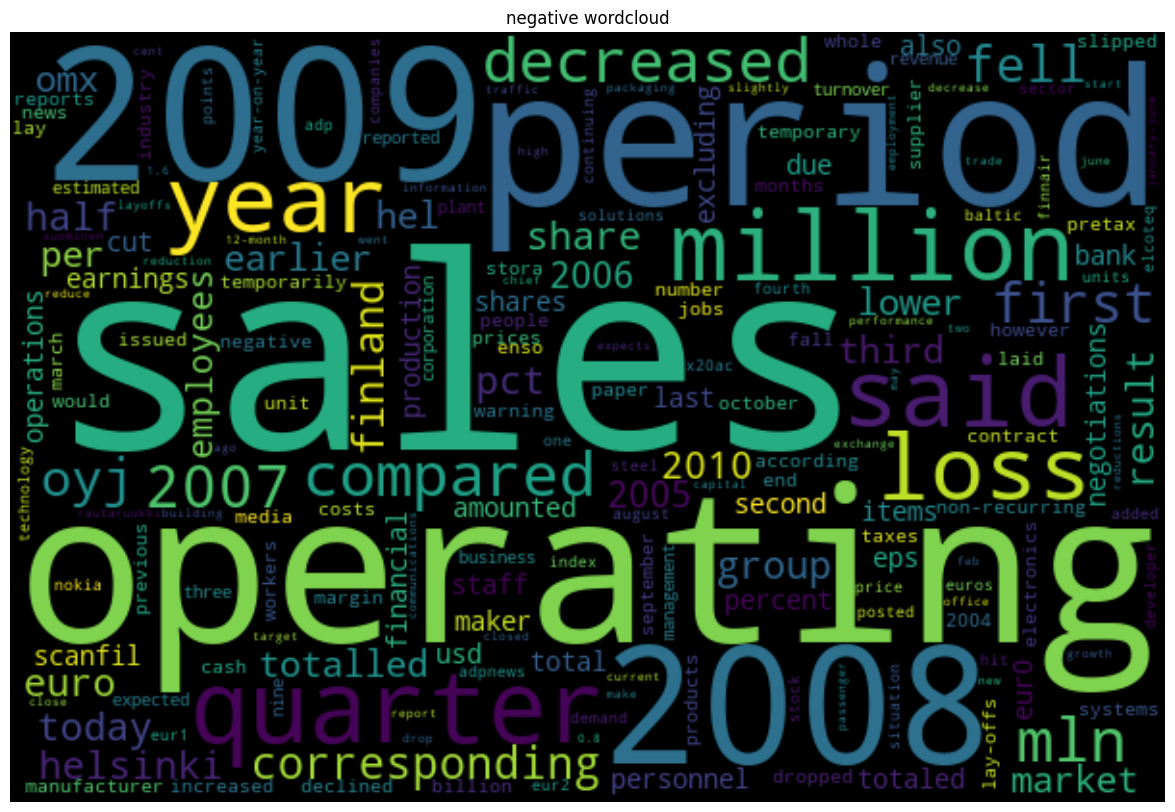

In [11]:
# wordcloud
wordcloud3 = WordCloud(width=600, height=400).generate_from_frequencies(words_neg_dict)

# draw
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title("negative wordcloud")
plt.axis("off")
plt.show()


## IIII. Word vectorization and model training

### IV.1. Sklearn

#### IV.1.1. Raw Text

In [12]:
X = df['text'].values
y = df["sentiment"].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

#### IV.1.2. word vectorization + Logistic Regression

In [14]:
# Simple BoW vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [15]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [16]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(max_iter=2000)

In [17]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [18]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.7639175257731958

In [19]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)
y_pred

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'positive', 'negative', 'neutral', 'neutral', 'neutral',
       'positive', 'negative', 'neutral', 'neutral', 'neutral',
       'negative', 'negative', 'neutral', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'positive', 'positive',
       'positive', 'neutral', 'positive', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral',
       'positive', 'negative', 'neutral', 'neutral', 'positive',
       'neutral', 'neutral', 'positive', 'negative', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neu

In [20]:
# confusion matrix by hand... :-)

pd.crosstab(y_test, y_pred)

col_0     negative  neutral  positive
row_0                                
negative        61       34        14
neutral         14      509        48
positive         6      113       171

#### IV.1.3. TF-IDF + Logistic Regression

In [21]:
# Or TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(max_iter=2000)

In [22]:
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

In [23]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.7680412371134021

eli5 to show word weight

In [24]:
import eli5
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','neutral','positive'], top=20)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['negative','neutral','positive'])

#### IV.1.4. Prediction

In [26]:
test_data = ["The Federal  is expected to drop interest rates in the next quarter."]
test_features = vectorizer.transform(test_data)
predicted_value = model.predict(test_features)
predicted_value

array(['neutral'], dtype=object)

#### IV.1.5. TF-IDF + Logistic Regression + processed data

In [27]:
X = df3['text'].values
y = df3["sentiment"].values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=18)
vectorizer = TfidfVectorizer()
X_train_vec_3 = vectorizer.fit_transform(X_train_2)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_3, y_train_2)
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.7185567010309278

### IV.2.  SPACY

In [28]:
# load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en_core_web_sm")

In [29]:
doc = nlp(X_test[1])

In [30]:
[(tok.text, tok.pos_) for tok in doc]

[('BasWare', 'PROPN'),
 ('Invoice', 'PROPN'),
 ('Processing', 'PROPN'),
 (',', 'PUNCT'),
 ('BasWare', 'PROPN'),
 ('Contract', 'PROPN'),
 ('Matching', 'PROPN'),
 (',', 'PUNCT'),
 ('BasWare', 'PROPN'),
 ('Order', 'PROPN'),
 ('Matching', 'PROPN'),
 ('and', 'CCONJ'),
 ('BasWare', 'PROPN'),
 ('KPI', 'PROPN'),
 ('Reporting', 'PROPN'),
 ('Tool', 'PROPN'),
 ('are', 'AUX'),
 ('part', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('BasWare', 'PROPN'),
 ("'s", 'PART'),
 ('Enterprise', 'PROPN'),
 ('Purchase', 'PROPN'),
 ('to', 'PART'),
 ('Pay', 'VERB'),
 ('solution', 'NOUN'),
 ('suite', 'NOUN'),
 ('.', 'PUNCT')]

In [31]:
len(X_train)

3876

In [32]:
tokenlist = []
for doc in nlp.pipe(X_train[:3500]):
    tokens =[tok.text.lower() for tok in doc if tok.pos_ in ['NOUN','ADJ','ADV','VERB'] and not tok.is_stop]
    tokenlist.append(tokens)

In [33]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(tokenlist)

In [34]:
len(dictionary)

5107

In [35]:
dictionary.filter_extremes(no_below=5, no_above=0.2)

In [36]:
len(dictionary)

1177

In [37]:
dictionary[0]

'company'

In [38]:
vectorizer = TfidfVectorizer(vocabulary=list(dictionary.values()))
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(max_iter=2000)

In [39]:
X_test_vec_2 = vectorizer.fit_transform(X_test)

In [40]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.7391752577319588

In [41]:
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','neutral','positive'], top=20)

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['negative','neutral','positive'])

In [43]:
test_data = ["The Federal  is expected to drop interest rates in the next quarter."]
test_features = vectorizer.transform(test_data)
predicted_value = model.predict(test_features)
predicted_value

array(['neutral'], dtype=object)